In [22]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

%matplotlib inline

house_data=datasets.load_boston()
house_data

housing_data = house_data.data
housing_features = house_data.feature_names
housing_target=house_data.target

#converting it into pandas
boston = pd.DataFrame(housing_data)
boston.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [83]:
boston.columns=housing_features
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
boston['PRICE']=housing_target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
print (house_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [22]:
boston.shape

(506, 15)

In [29]:
boston.PRICE.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

# Feature selection

Though the original Boston comes with already selected features to use when modelling, i preferred to perform my own feature selection to select the features. To do this, I use lasso regulization:


In [54]:
boston.corr()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
1,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


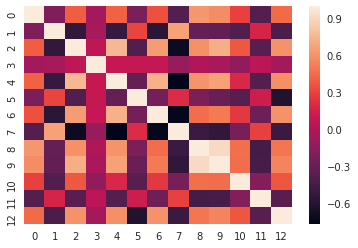

In [50]:

sn.heatmap(boston.corr())


##### 2. Using lasso to perform feature selection

In [ ]:

def print_out(coefs, names = None, sort = False):
    names = ["%s" % x for x in names]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
 



from sklearn.datasets import load_boston
  
boston2 = load_boston()
scaler = StandardScaler()
X = scaler.fit_transform(boston2["data"])
Y = boston2["target"]
names = boston2["feature_names"]
  
lasso = Lasso(alpha=.3)
lasso.fit(X, Y)
lasso.coef_
print ("Model:", print_out(lasso.coef_,names))

I decided to use select all variables with a weighted coefficient of absolute values greater than 1. 

This gives me: 

    1.RM-average number of rooms per dwelling
    
    2.LSTAT-% lower status of the population
    
    3.PTRATIO-pupil-teacher ratio by town
    
    4.DIS weighted distances to five Boston employment centres

To prove if there is indeed the above selected features have any correlation with the Price of a house,I perform a 
graphical representation

In [ ]:
RM=boston.iloc[:,5]
DIS=boston.iloc[:,8]
PTRATIO=boston.iloc[:,10]
LSTAT=boston.iloc[:,11]
PRICE=boston.iloc[:,12]

plt.scatter(RM,PRICE)



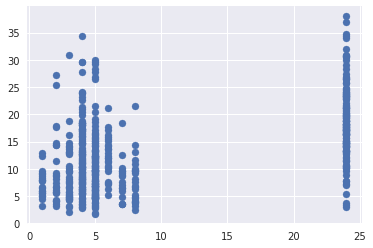

In [95]:
plt.scatter(DIS,PRICE)

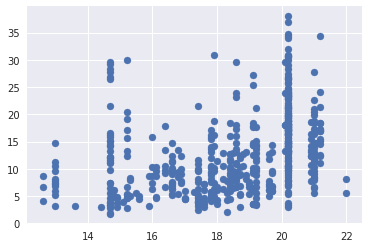

In [97]:

plt.scatter(PTRATIO,PRICE)

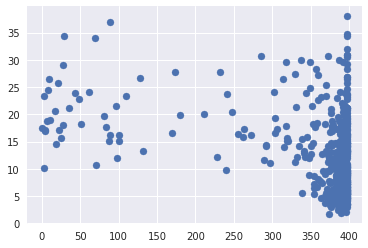

In [98]:
plt.scatter(LSTAT,PRICE)


We can see from the scatter plots above that there isnt any correlataion between the DIS feature and the target PRICE.
I therefore do away with it and proceed on with the other three:
    

## Modeling 

### Performance Metric
Before Coming up with the models, we need a metric to use to select the best performing model. 
For this project, we will be calculating the coefficient of determination, R2, to quantify the model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 always fails to predict the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable.(The higher the better)

In [66]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)

    # Return the score
    return score

##### Splitting dataset into training and test data

In [23]:
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle

X=boston.iloc[:,[5,10,11]]
y=boston.iloc[:,12]

X, y = shuffle(X, y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print (len(X_train)/len(X))
print (len(X_test)/len(X))

0.7984189723320159
0.2015810276679842


# Question 3 - Training and Testing

## What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

We need a way to choose between machine learning models which will perform well on new data. We therefore split the dataset into two so we can perform a test on the other data we didnt train on

Training and testing the data on the same data could maximize training accuracy that overfit the training dataset hence not perform well when exposed to a new data set.
But, maximizing training accuracy rewards overly complex models that overfit the training data.


Train/test split however provides a high variance estimate. To solve this I decided to use K-fold cross-validation other than the train split.


### Decision Tree

In [41]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.tree import DecisionTreeRegressor


regressor = DecisionTreeRegressor()
# Set up the parameters we wish to tune
parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

# Make an appropriate scoring function
score_function = make_scorer(score_func=mean_squared_error, greater_is_better=False)


grid = GridSearchCV(regressor, parameters, cv=10, scoring=score_function )

# Fit the learner to the data to obtain the optimal model with tuned parameters
grid.fit(X, y)
grid.best_estimator_
grid.grid_scores_

[mean: -44.74973, std: 10.00997, params: {'max_depth': 1},
 mean: -30.50862, std: 6.69590, params: {'max_depth': 2},
 mean: -22.69479, std: 4.97840, params: {'max_depth': 3},
 mean: -22.27102, std: 6.44077, params: {'max_depth': 4},
 mean: -23.35749, std: 9.15933, params: {'max_depth': 5},
 mean: -24.90379, std: 8.20835, params: {'max_depth': 6},
 mean: -25.66876, std: 7.36150, params: {'max_depth': 7},
 mean: -28.54370, std: 8.35045, params: {'max_depth': 8},
 mean: -31.00996, std: 8.63734, params: {'max_depth': 9},
 mean: -33.46564, std: 8.85507, params: {'max_depth': 10}]

### Random Forest 

In [58]:
from sklearn.ensemble import RandomForestRegressor

#scoring
score= make_scorer(score_func=mean_squared_error, greater_is_better=False)
#turn run to True to run Gridsearch again
run_gs = True

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestRegressor()
    
    grid_search = GridSearchCV(forest,
                               scoring=score,
                               param_grid=parameter_grid,
                               cv=5)

    grid_search.fit(X, y)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestRegressor(**parameters)
    model.fit(X,y)
    
    #compute_score(model, train, targets, scoring='score')
    xval = cross_val_score(model, X, y, cv = 5, scoring=score)
    print (np.mean(xval))

Best score: -20.18144976338491
Best parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


# Predictions¶
I have trained and tested my models, I can now use it for prediction 

#### prediction using Decision Tree

In [46]:
CLIENT_FEATURES = [[ 5.6090,332.09, 12.13]]

RM=5.6090
PTRATIO=332.09
LSTAT= 12.13
PRICE= grid.predict(CLIENT_FEATURES)
print ("Predicted house value: {0:.3f}".format(PRICE[0]))

Predicted house value: 15.949


#### Prediction using Random Forest

In [60]:
PRICE= model.predict(CLIENT_FEATURES)
print ("Predicted house value: {0:.3f}".format(PRICE[0]))

Predicted house value: 19.240


# Complexity Curves¶

Complexity curve below show how the performance of a decision tree model varies when the depth of the model is varied
The graph produces two complexity curves — one for training and one for validation. 
We can see that the performance of the model is optimum at around a depth of 3. This is where the model is able to generalize the training data.

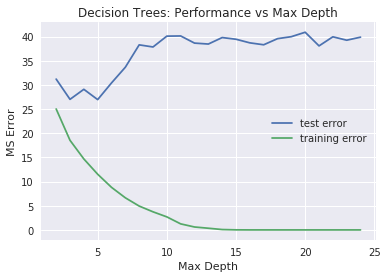

In [203]:
from sklearn.tree import DecisionTreeRegressor


# We will vary the depth of decision trees from 2 to 25
max_depth = range(2, 25)
train_err = np.zeros(len(max_depth))
test_err = np.zeros(len(max_depth))


for i, d in enumerate(max_depth):
    # Setup a Decision Tree Regressor so that it learns a tree with depth d
    regressor = DecisionTreeRegressor(max_depth=d)
    
    # Fit the learner to the training data
    regressor.fit(X_train, y_train)

    # Find the MSE on the training set
    train_err[i] = mean_squared_error(y_train, regressor.predict(X_train))
    
    # Find the MSE on the testing set
    test_err[i] = mean_squared_error(y_test, regressor.predict(X_test))

# Plot training and test error as a function of the depth of the decision tree learnt
plt.figure()
plt.title('Decision Trees: Performance vs Max Depth')
plt.plot(max_depth, test_err, label = 'test error')
plt.plot(max_depth, train_err, label = 'training error')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('MS Error')
plt.show()

# Bias-Variance Tradeoff

When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

Answer: 

 ## To identify when a model is suffering from high bias or high variance.

#### High variance models have a gap between the training and validation scores.
This is because it is able to fit the model well but unable to generalize well resulting in a high training score but low validation score

#### High bias models have have a small or no gap between the training and validations scores.
This is because it is unable to fit the model well and unable to generalize well resulting in both scores converging to a similar low score(Both training and testing scores are low).


I show this using a decision tree Regression below

In [69]:
def curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print ("Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .")
    
    # Create the figure window
    fig = plt.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


/home/nlubalo/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


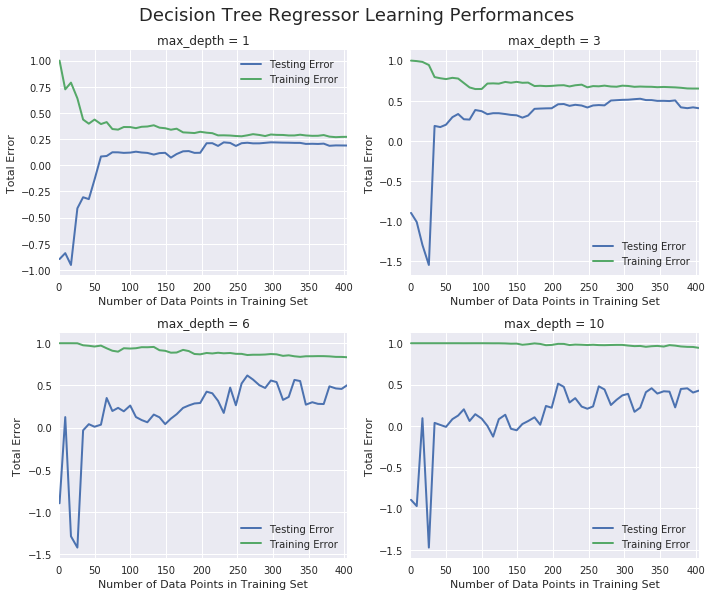

In [70]:
curves(X_train, y_train, X_test, y_test)